In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# load in all of the data
sodankyla_cloud_data = pd.read_csv(r"/Users/elliotdable/Documents/UCL/research/fabry_perot_ml/sodankyla_fpi/sodankyla_cloud_data.csv")
kiruna_cloud_data = pd.read_csv(r"/Users/elliotdable/Documents/UCL/research/fabry_perot_ml/kiruna_fpi/kiruna_cloud_data.csv")
sodankyla_red_fpi_data = pd.read_csv(r"/Users/elliotdable/Documents/UCL/research/fabry_perot_ml/sodankyla_fpi/sodankyla_red_fpi_data.csv")
kiruna_red_fpi_data = pd.read_csv(r"/Users/elliotdable/Documents/UCL/research/fabry_perot_ml/kiruna_fpi/Kiruna_Red/kiruna_red_fpi_data.csv")

# all datetime columns need to be converted back to datetime from string as pandas cant save them in this format
sodankyla_red_fpi_data.datetime = pd.to_datetime(sodankyla_red_fpi_data.datetime)
sodankyla_cloud_data.datetime = pd.to_datetime(sodankyla_cloud_data.datetime)
kiruna_red_fpi_data.datetime = pd.to_datetime(kiruna_red_fpi_data.datetime)
kiruna_cloud_data.datetime = pd.to_datetime(kiruna_cloud_data.datetime)

In [44]:
kiruna_red_fpi_data.keys()

Index(['mirror', 'intensity', 'intensityError', 'windSpeed', 'windSpeedError',
       'temp', 'tempError', 'chiSquared', 'sigToNoiseRatio', 'datetime'],
      dtype='object')

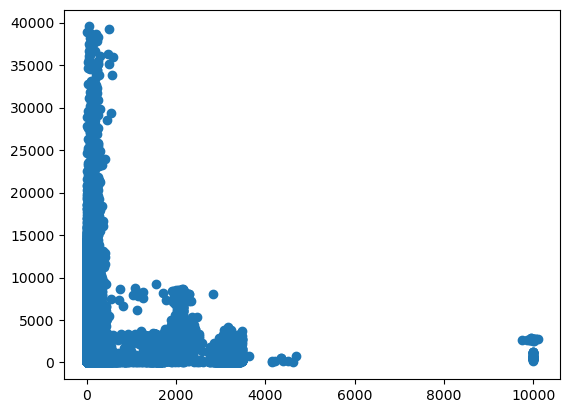

In [51]:
plt.scatter(abs(kiruna_red_fpi_data.windSpeed), kiruna_red_fpi_data.intensity)